<a href="https://colab.research.google.com/github/Xerconia/Transitlytics/blob/main/hisa_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import and view data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
hh = pd.read_csv("dataset/hhv2pub.csv")
ldt = pd.read_csv("dataset/ldtv2pub.csv")
per = pd.read_csv("dataset/perv2pub.csv")
trip = pd.read_csv("dataset/tripv2pub.csv")
veh = pd.read_csv("dataset/vehv2pub.csv")

In [3]:
""" print(hh)
print(ldt)
print(per)
print(trip)
print(veh) """


' print(hh)\nprint(ldt)\nprint(per)\nprint(trip)\nprint(veh) '

Question: Of the total trips between 0-3 miles, what percent is done by walking, biking, public transit, or personal vehicle? How about trips of 3-10 miles or 10+ miles?

In [4]:
#trpmiles, trptrans
#avg trip miles by transportation mode

#select variables of interest
trp_sel = trip[["TRPMILES","TRPTRANS"]]
trp_sel

#group trip miles by mode and take avg of miles
trp_grp = trp_sel.groupby("TRPTRANS").mean()
trp_grp

,TRPMILES
TRPTRANS,
1,10.930488
2,10.633207
3,13.027771
4,14.374607
6,69.428776
7,8.702333
8,6.590010
9,5.861167
10,5.147089


#to do: add desc to codes

01=Car
02=Van
03=SUV/Crossover
04=Pickup truck
06=Recreational Vehicle
07=Motorcycle
08=Public or commuter bus
09=School bus
10=Street car or trolley car
11=Subway or elevated rail
12=Commuter rail
13=Amtrak
14=Airplane
15=Taxicab or limo service
16=Other ride-sharing service
17=Paratransit/ Dial a ride
18=Bicycle (including bikeshare, ebike, etc.)
19=E-scooter
20=Walked
21=Other (specify)

#to do: visualize
https://python-graph-gallery.com/

Question: Does certain (zip codes -> people with higher incomes) tend to have more personal vehicle use for their daily trips?

In [17]:
inc_mapping_series = pd.Series({-7: "I prefer not to answer",
                            -8: "I don't know", 
                            1: "Less than $10,000", 
                            2: "$10,000 to $14,999",
                            3: "$15,000 to $24,999",
                            4: "$25,000 to $34,999",
                            5: "$35,000 to $49,999",
                            6: "$50,000 to $74,999",
                            7: "$75,000 to $99,999",
                            8: "$100,000 to $124,999",
                            9: "$125,000 to $149,999",
                            10: "$150,000 to $199,999",
                            11: "$200,000 or more"
                            })
trip['HHFAMINC_label'] = trip['HHFAMINC'].replace(inc_mapping_series)
#print(trip)

trans_mapping_series = pd.Series({1: "Car", 
                            2: "Van",
                            3: "SUV/Crossover",
                            4: "Pickup truck",

                            6: "Recreational Vehicle",
                            7: "Motorcycle",
                            8: "Public or commuter bus",
                            9: "School bus",
                            10: "Street car or trolley car",
                            11: "Subway or elevated rail",
                            12: "Commuter rail",
                            13: "Amtrak",
                            14: "Airplane",
                            15: "Taxicab or limo service",
                            16: "Other ride-sharing service",
                            17: "Paratransit/ Dial a ride",
                            18: "Bicycle (including bikeshare, ebike, etc.)",
                            19: "E-scooter",
                            20: "Walked",
                            21: "Other (specify)"
                            })
trip['TRPTRANS_label'] = trip['TRPTRANS'].replace(trans_mapping_series)


TRPTRANS_label          Airplane  Amtrak  \
HHFAMINC_label                             
$10,000 to $14,999             0       0   
$100,000 to $124,999          22       2   
$125,000 to $149,999           4       0   
$15,000 to $24,999             1       0   
$150,000 to $199,999           7       0   
$200,000 or more               9       1   
$25,000 to $34,999             0       1   
$35,000 to $49,999             4       0   
$50,000 to $74,999             5       0   
$75,000 to $99,999            19       0   
I don't know                   0       0   
I prefer not to answer         0       0   
Less than $10,000              0       0   

TRPTRANS_label          Bicycle (including bikeshare, ebike, etc.)   Car  \
HHFAMINC_label                                                             
$10,000 to $14,999                                              13   235   
$100,000 to $124,999                                            35  1355   
$125,000 to $149,999               

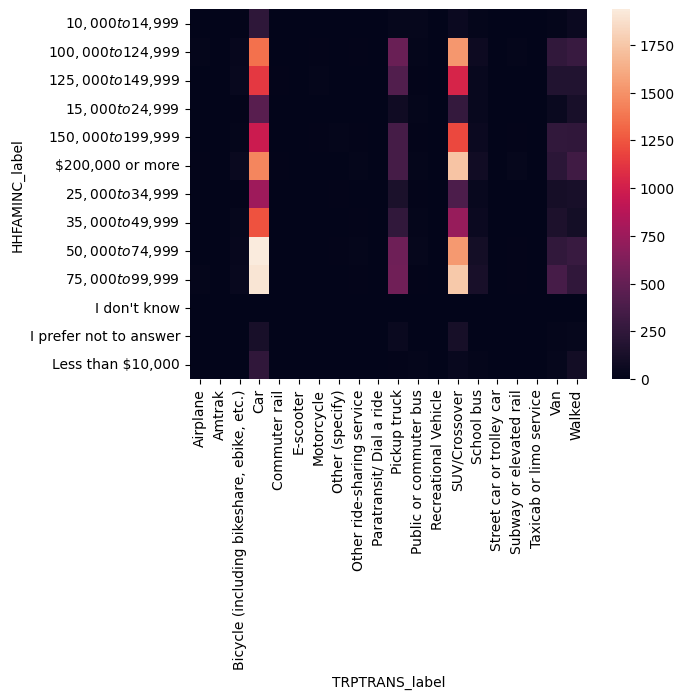

In [19]:
# Creating crosstab
crosstb = pd.crosstab(trip.HHFAMINC_label, trip.TRPTRANS_label)
print(crosstb)

# Heatmap
heatmap = sns.heatmap(crosstb)

Does this vary by whether the household is urban/rural?

In [ ]:
#split into two datasets
urban = trip[trip["URBRUR"] == 1]

rural = trip[trip["URBRUR"] == 2]

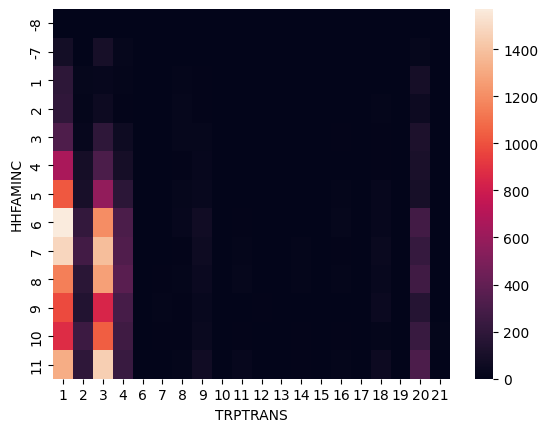

In [ ]:
#Urban
# Creating crosstab
ucrosstb = pd.crosstab(urban.HHFAMINC, urban.TRPTRANS)
#print(ucrosstb)

# Heatmap
uheatmap = sns.heatmap(ucrosstb)


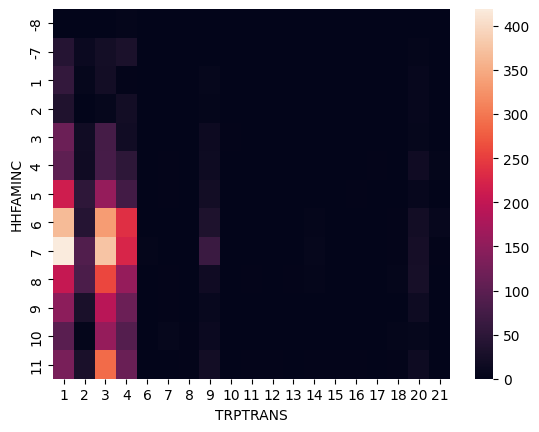

In [ ]:
#Rural
# Creating crosstab
rcrosstb = pd.crosstab(rural.HHFAMINC, rural.TRPTRANS)
#print(rcrosstb)

# Heatmap
rheatmap = sns.heatmap(rcrosstb)
